# Exploratory data analysis
On the data, cleaned according to the project requirements, we will perform a small EDA so to understand the key features in the distribution of data. The main purpose are
1) to understand the dataset and stimulate the curiousity
1) to improve predictions by either regression, classification or neural networks.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabular_data import load_airbnb

%matplotlib inline

In [7]:
# load the dataset
df = pd.read_csv('./airbnb-property-listings/tabular_data/clean_tabular_data.csv')
df = df.drop(532)

df_numeric = df.drop(columns=['Unnamed: 0', 'Unnamed: 19']).select_dtypes(include='number')

In [3]:
# plot dataframe shape
df.shape

(890, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            890 non-null    int64  
 1   ID                    890 non-null    object 
 2   Category              890 non-null    object 
 3   Title                 890 non-null    object 
 4   Description           830 non-null    object 
 5   Amenities             890 non-null    object 
 6   Location              890 non-null    object 
 7   guests                890 non-null    object 
 8   beds                  890 non-null    float64
 9   bathrooms             890 non-null    float64
 10  Price_Night           890 non-null    int64  
 11  Cleanliness_rating    890 non-null    float64
 12  Accuracy_rating       890 non-null    float64
 13  Communication_rating  890 non-null    float64
 14  Location_rating       890 non-null    float64
 15  Check-in_rating       8

In [5]:
df.sample(5)

,Unnamed: 0,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,...,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Unnamed: 19
107,122,733e26ca-d4f7-41ee-93e9-cd1f0f20b1d2,Treehouses,02 - Treetop Flyer,"[""NOW WITH ELECTRIC!! The Treetop Flyer is a s...","['What this place offers', 'Scenic views', 'Mo...",Berea Kentucky United States,8,2.0,1.0,...,4.9,4.9,4.9,4.9,5.0,4.8,44.0,https://www.airbnb.co.uk/rooms/27275008?adults...,1,NaN
257,294,ea725186-bff7-4b44-9fab-eb3d8d704cb4,Chalets,"River Rose Retreat Shepherds Hut, view and hot...","[""River Rose Retreat is a luxurious and cosy s...","['What this place offers', 'Scenic views', 'Ri...",Southampton England United Kingdom,2,1.0,1.0,...,5.0,4.9,4.9,5.0,5.0,4.7,23.0,https://www.airbnb.co.uk/rooms/44107505?adults...,1,NaN
498,538,fc19f979-ce83-4882-a357-252404255513,Amazing pools,"Crocus at Stancombe Manor, pool and tennis","['Crocus, apartment on the ground floor of Sta...","['What this place offers', 'Scenic views', 'Ga...",Sherford Devon United Kingdom,4,2.0,1.0,...,4.6,4.9,5.0,4.5,4.9,4.8,59.0,https://www.airbnb.co.uk/rooms/44843038?adults...,1,NaN
745,823,7514e6d6-2cdb-4659-a162-4bbd78682036,Offbeat,"""At the rhythm of the tides"" sea and modern de...","['""Au rythme des marées"" is a beautiful, moder...","['What this place offers', 'Bathroom', 'Hair d...",Trévou-Tréguignec Bretagne France,5,3.0,1.0,...,4.9,4.8,5.0,4.7,4.9,4.6,52.0,https://www.airbnb.co.uk/rooms/24201340?adults...,2,NaN
800,882,17663d03-fb78-4090-8f43-ba52071faaa8,Beachfront,"Beach front home with cosy, coastal interiors.","['Featured in The Times ""50 Great British Beac...","['What this place offers', 'Bathroom', 'Hair d...",Seaford England United Kingdom,4,2.0,1.0,...,5.0,4.9,5.0,4.9,4.9,4.7,22.0,https://www.airbnb.co.uk/rooms/17518626?adults...,2,NaN


In [6]:
df['Category'].unique()

array(['Treehouses', 'Chalets', 'Amazing pools', 'Offbeat', 'Beachfront'],
      dtype=object)

In [7]:
df.describe()

,Unnamed: 0,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,Unnamed: 19
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,1.0
mean,491.866292,2.396629,1.365169,152.368539,5.071573,4.903146,4.932022,4.903596,4.943146,4.764157,34.733371,3.0
std,281.889409,1.827484,0.821752,127.198158,6.543922,0.135121,0.122210,0.121337,0.103609,0.181936,14.465732,NaN
min,0.000000,1.000000,0.000000,3.000000,3.800000,4.000000,3.900000,4.000000,3.900000,3.300000,3.000000,3.0
25%,258.500000,1.000000,1.000000,83.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,24.000000,3.0
50%,483.500000,2.000000,1.000000,119.000000,4.900000,4.900000,5.000000,4.900000,5.000000,4.800000,34.000000,3.0
75%,732.750000,3.000000,1.500000,175.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,44.000000,3.0
max,987.000000,17.000000,10.000000,1132.000000,200.000000,5.000000,5.000000,5.000000,5.000000,5.000000,84.000000,3.0


/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123:

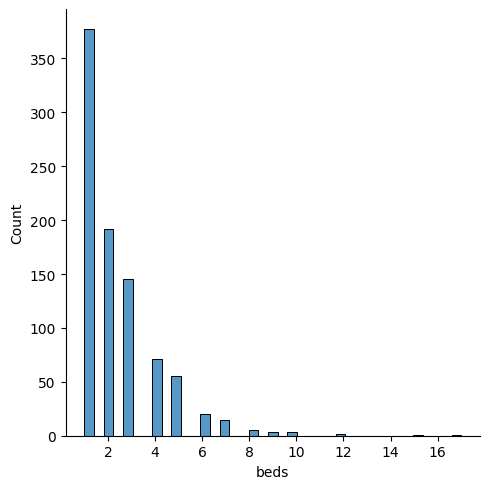

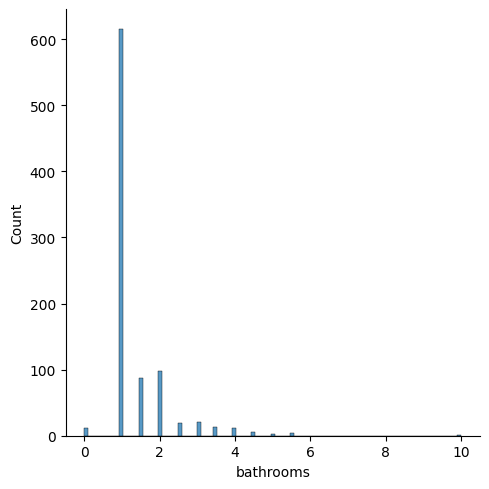

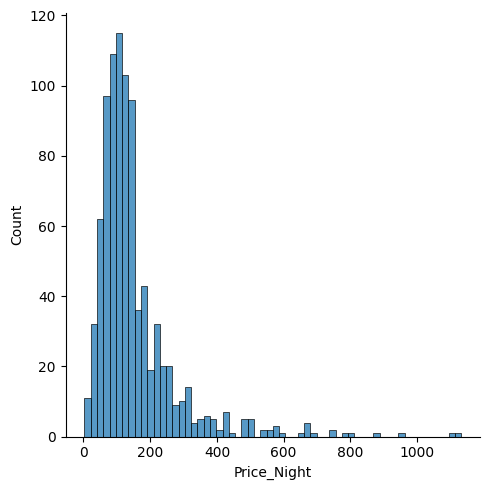

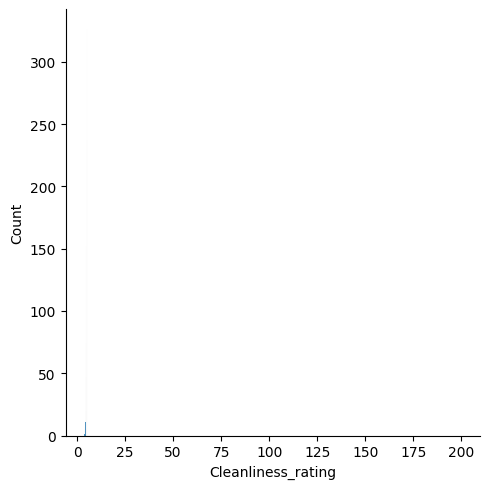

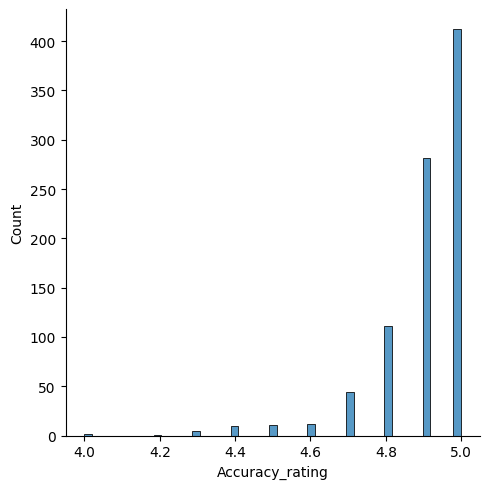

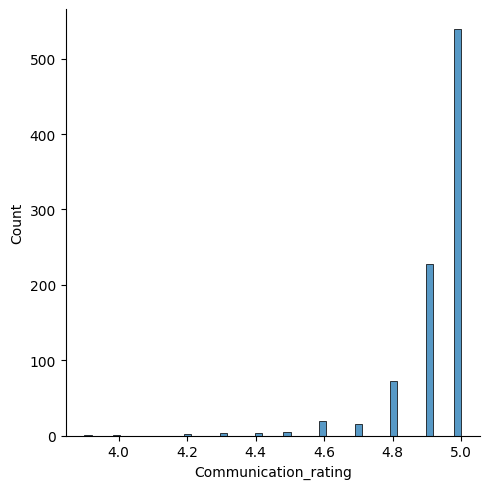

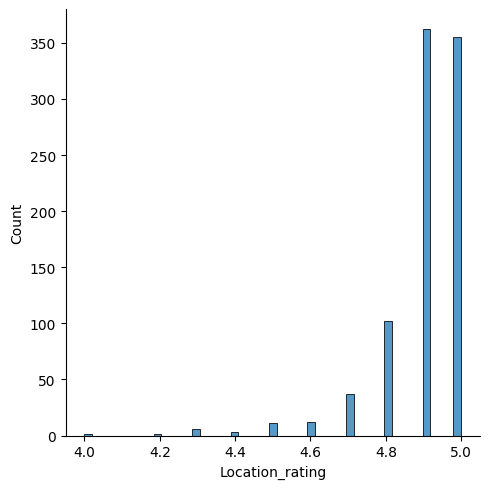

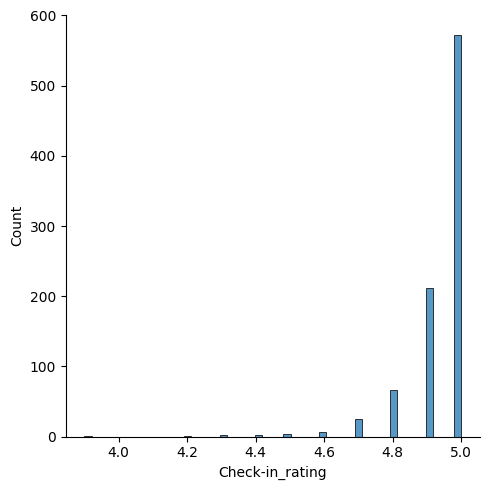

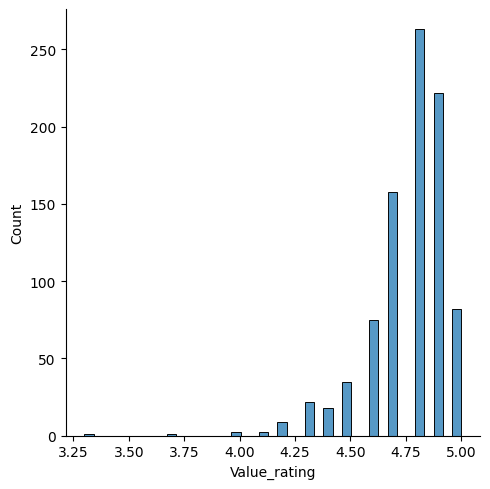

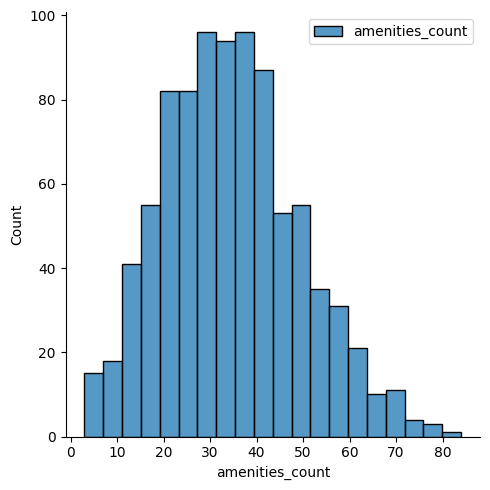

In [13]:
for column in df_numeric.columns:
    sns.displot(df_numeric[column], kde=False, label=column)

plt.legend()
plt.show()

In [10]:
df[df["Cleanliness_rating"]>5]

,Unnamed: 0,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms,Unnamed: 19
532,586,4c917b3c-d693-4ee4-a321-f5babc728dc9,Amazing pools,Stunning Cotswolds Water Park,sleeps 6 with pool,"['About this space', 'Enjoy a discount for boo...","['What this place offers', 'Bathroom', 'Hair d...",Somerford Keynes England United Kingdom,6.0,4.0,3,200.0,4.8,4.9,5.0,4.8,4.9,4.7,46,https://www.airbnb.co.uk/rooms/49009981?adults...,3.0


In [11]:
df["amenities_count"][df["Cleanliness_rating"]>5]

532    4.7
Name: amenities_count, dtype: float64